# EDA (предварительный анализ данных)

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('marketpele_ab_test.xlsx')

In [87]:
df.head(5)

,date,publisher_id,platform,group_name,pageviews,visible_pageviews,sessions,revenue,sponsord_clicks,organic_clicks
0,2019-03-01,101,Desktop,A,16580,5418,12684,34.5201,300,849
1,2019-03-01,101,Desktop,B,16191,4906,12717,32.9211,268,555
2,2019-03-01,106,Desktop,A,16227,11395,11750,20.1620,601,2425
3,2019-03-01,106,Desktop,B,15060,10369,11967,19.7429,663,1194
4,2019-03-01,106,Mobile,A,30494,7715,22843,82.9329,456,1600


In [88]:
df.info()
# пропусков не обнаружено

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               126 non-null    datetime64[ns]
 1   publisher_id       126 non-null    int64         
 2   platform           126 non-null    object        
 3   group_name         126 non-null    object        
 4   pageviews          126 non-null    int64         
 5   visible_pageviews  126 non-null    int64         
 6   sessions           126 non-null    int64         
 7   revenue            126 non-null    float64       
 8   sponsord_clicks    126 non-null    int64         
 9   organic_clicks     126 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 10.0+ KB


In [89]:
df.describe()

,date,publisher_id,pageviews,visible_pageviews,sessions,revenue,sponsord_clicks,organic_clicks
count,126,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,2019-03-04 00:00:00,272.555556,28107.198413,7630.865079,16348.309524,47.421994,509.039683,1209.634921
min,2019-03-01 00:00:00,101.000000,2805.000000,632.000000,909.000000,1.584100,53.000000,114.000000
25%,2019-03-02 00:00:00,106.000000,14578.750000,5059.750000,8571.750000,16.159825,276.250000,568.250000
50%,2019-03-04 00:00:00,123.000000,20074.000000,6866.000000,13134.500000,32.374000,387.500000,954.500000
75%,2019-03-06 00:00:00,373.000000,32941.500000,10366.750000,23601.000000,75.917050,598.750000,1608.250000
max,2019-03-07 00:00:00,700.000000,90073.000000,18156.000000,46427.000000,179.558300,1752.000000,3955.000000
std,NaN,216.170731,20122.502256,3654.500816,11981.253241,39.422367,375.174059,871.016065


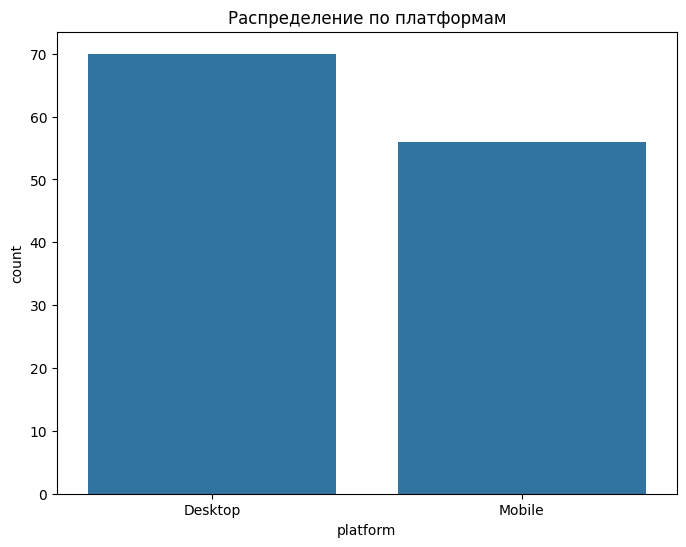

In [90]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='platform')
plt.title('Распределение по платформам')
plt.show()

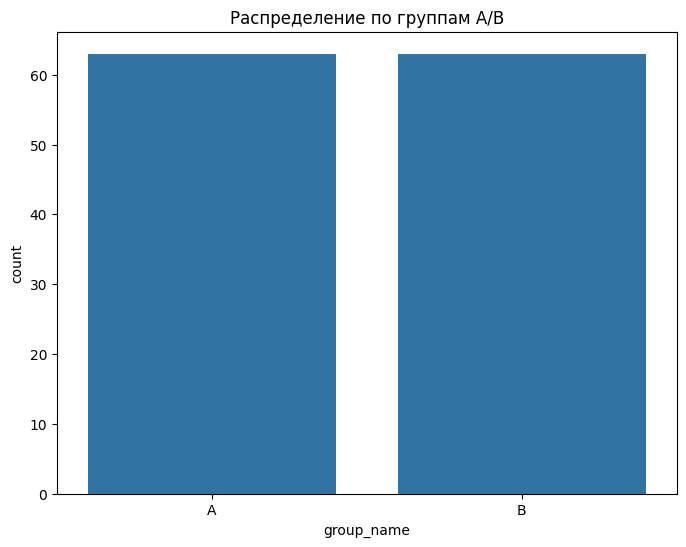

In [91]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='group_name')
plt.title('Распределение по группам A/B')
plt.show()

# Проверка данных на нормальность 

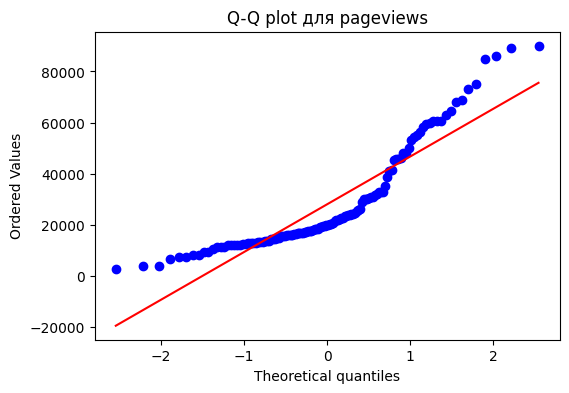

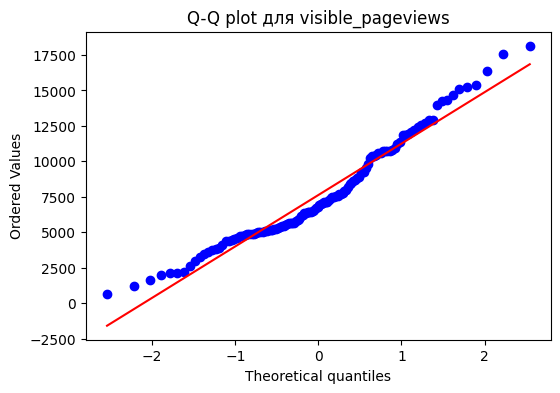

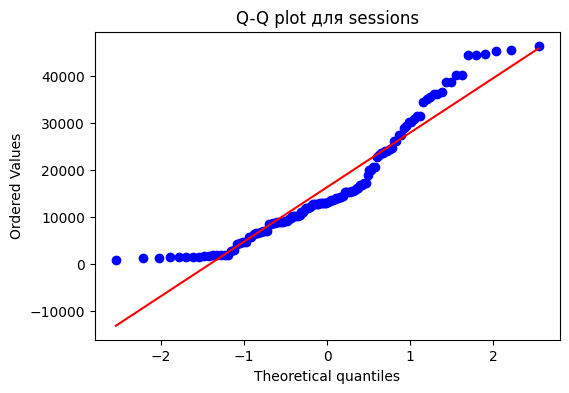

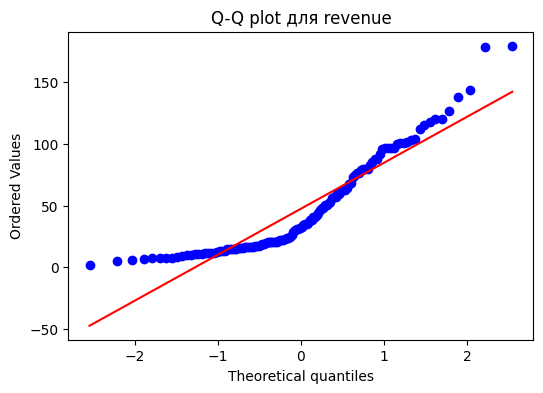

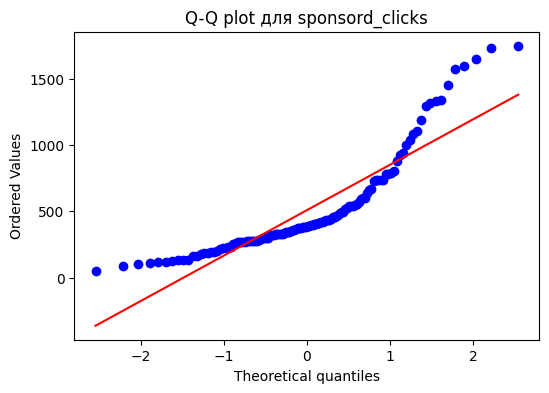

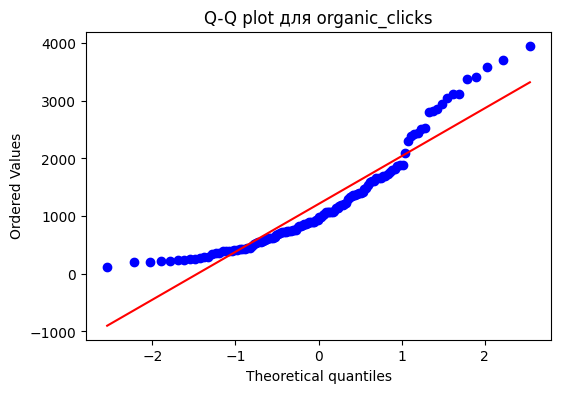

In [92]:
from scipy import stats
col = ['pageviews', 'visible_pageviews', 'sessions', 'revenue', 'sponsord_clicks', 'organic_clicks']

# Q-Q plot для каждого числового столбца
for column in col:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot для {column}')
    plt.show()

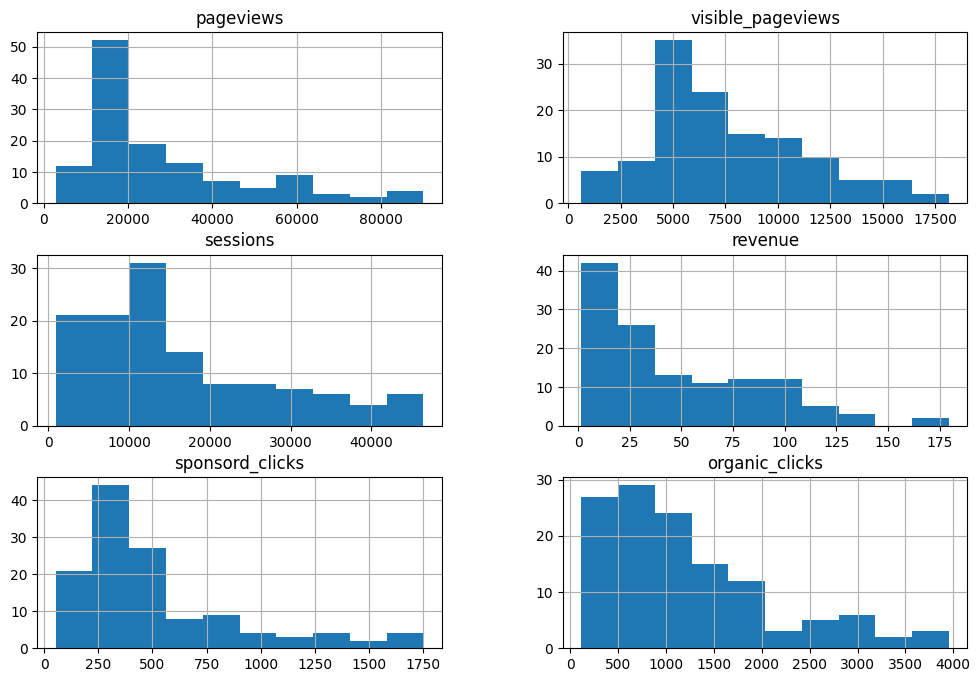

In [93]:
# распределение данных
import matplotlib.pyplot as plt
import seaborn as sns
# Гистограммы
df[col].hist(figsize=(12, 8))
plt.show()

In [94]:
from scipy.stats import shapiro, kstest

# Шапиро-Уилк тест
for column in col:
    stat, p = shapiro(df[column])
    print(f'Шапиро-Уилк тест для {column}: Stat={stat}, p={p}')
    if p > 0.05:
        print(f'{column} выглядит как нормальное распределение (не отвергаем H0)\n')
    else:
        print(f'{column} не выглядит как нормальное распределение (отвергаем H0)\n')

# Колмогоров-Смирнов тест
for column in col:
    stat, p = kstest(df[column], 'norm', args=(df[column].mean(), df[column].std()))
    print(f'Колмогоров-Смирнов тест для {column}: Stat={stat}, p={p}')
    if p > 0.05:
        print(f'{column} выглядит как нормальное распределение (не отвергаем H0)\n')
    else:
        print(f'{column} не выглядит как нормальное распределение (отвергаем H0)\n')
# В большинстве случаев данные распределены не нормально, за исключение в тесте Колмогоров-Смирнов - visible_pageviews

Шапиро-Уилк тест для pageviews: Stat=0.8367489321312396, p=1.697798215491429e-10
pageviews не выглядит как нормальное распределение (отвергаем H0)

Шапиро-Уилк тест для visible_pageviews: Stat=0.9572128432561566, p=0.0005345481103373409
visible_pageviews не выглядит как нормальное распределение (отвергаем H0)

Шапиро-Уилк тест для sessions: Stat=0.9093966440611637, p=3.5804080340895274e-07
sessions не выглядит как нормальное распределение (отвергаем H0)

Шапиро-Уилк тест для revenue: Stat=0.8699547157845402, p=3.9935110183818455e-09
revenue не выглядит как нормальное распределение (отвергаем H0)

Шапиро-Уилк тест для sponsord_clicks: Stat=0.8157636225258469, p=2.85403501756747e-11
sponsord_clicks не выглядит как нормальное распределение (отвергаем H0)

Шапиро-Уилк тест для organic_clicks: Stat=0.8829268373502205, p=1.576817707084115e-08
organic_clicks не выглядит как нормальное распределение (отвергаем H0)

Колмогоров-Смирнов тест для pageviews: Stat=0.2009256728660075, p=6.18475728830

# Гипотезы 

## Продуктовая гипотеза:
 Изменение расположения рекламных блоков (вариант B) приведет к увеличению дохода (RPM) и/или повышению Organic CTR по сравнению с текущим расположением (вариант A), не ухудшив при этом количество просмотров за сессию.
 
**H0 (Нулевая гипотеза):** Разница в RPM, RPS, Paid/Organic CTR и количестве просмотров за сессию между вариантами A и B равна нулю.

**H1 (Альтернативная гипотеза):** Разница в RPM, RPS, Paid/Organic CTR и количестве просмотров за сессию между вариантами A и B не равна нулю (двусторонний тест).


In [95]:
df['RPM'] = (df['revenue'] / df['pageviews']) * 1000
# Paid CTR (Click-Through Rate для платных кликов)
df['Paid_CTR'] = df['sponsord_clicks'] / df['pageviews']
# Organic CTR (Click-Through Rate для органических кликов)
df['Organic_CTR'] = df['organic_clicks'] / df['pageviews']
# Количество просмотров за сессию
df['Page_views_per_session'] = df['visible_pageviews'] / df['sessions'] 
df['RPS'] = (df['revenue'] / df['sessions'])* 1000

In [96]:
# Разделение данных на группы A и B
group_a = df[df['group_name'] == 'A']
group_b = df[df['group_name'] == 'B']

In [97]:
from scipy.stats import mannwhitneyu

# Функция для проверки гипотез
def test_hypothesis(column):
    stat, p = mannwhitneyu(group_a[column], group_b[column], alternative='two-sided')
    print(f'U-тест Манна-Уитни для {column}: Stat={stat}, p={p}')
    if p > 0.05:
        print(f'Нет значимой разницы между группами A и B в {column} (не отвергаем H0)\n')
    else:
        print(f'Существует значимая разница между группами A и B в {column} (отвергаем H0)\n')

# Проверка гипотез для каждого показателя
test_hypothesis('RPM')
test_hypothesis('Paid_CTR')
test_hypothesis('Organic_CTR')
test_hypothesis('Page_views_per_session')
test_hypothesis('RPS')

U-тест Манна-Уитни для RPM: Stat=1863.0, p=0.5549341422400795
Нет значимой разницы между группами A и B в RPM (не отвергаем H0)

U-тест Манна-Уитни для Paid_CTR: Stat=1764.0, p=0.2830813725146053
Нет значимой разницы между группами A и B в Paid_CTR (не отвергаем H0)

U-тест Манна-Уитни для Organic_CTR: Stat=3473.0, p=3.8639612881392986e-13
Существует значимая разница между группами A и B в Organic_CTR (отвергаем H0)

U-тест Манна-Уитни для Page_views_per_session: Stat=2188.0, p=0.3219411863193544
Нет значимой разницы между группами A и B в Page_views_per_session (не отвергаем H0)

U-тест Манна-Уитни для RPS: Stat=1908.0, p=0.7107724588127413
Нет значимой разницы между группами A и B в RPS (не отвергаем H0)



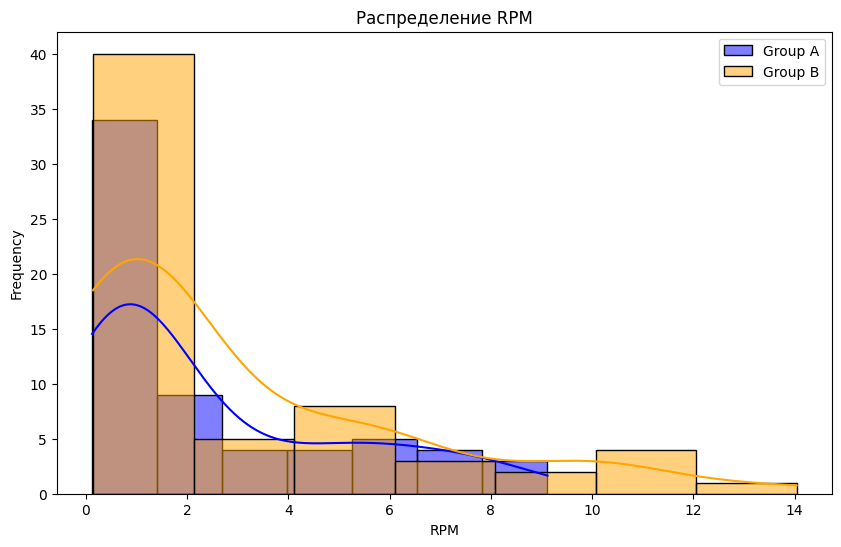

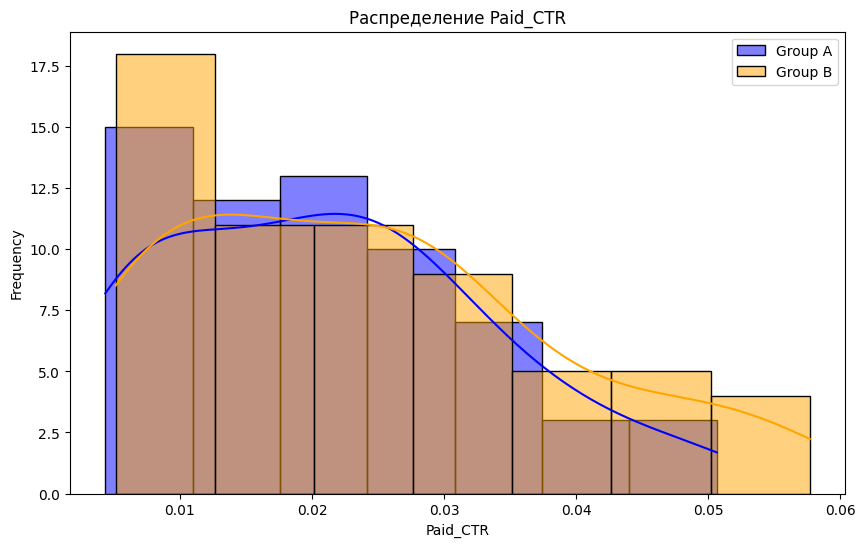

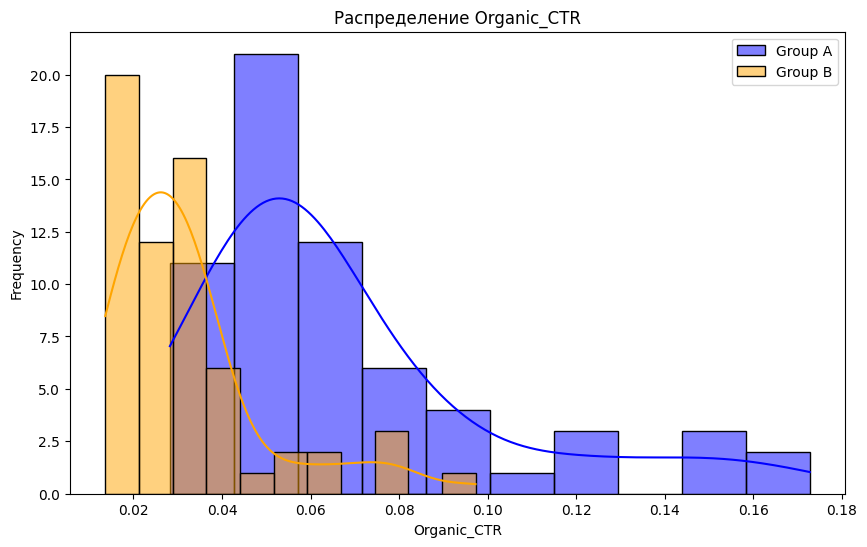

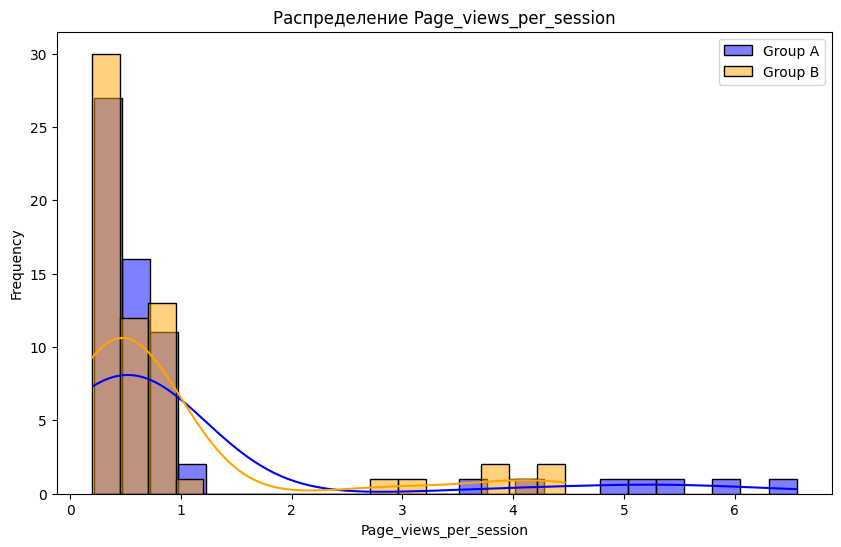

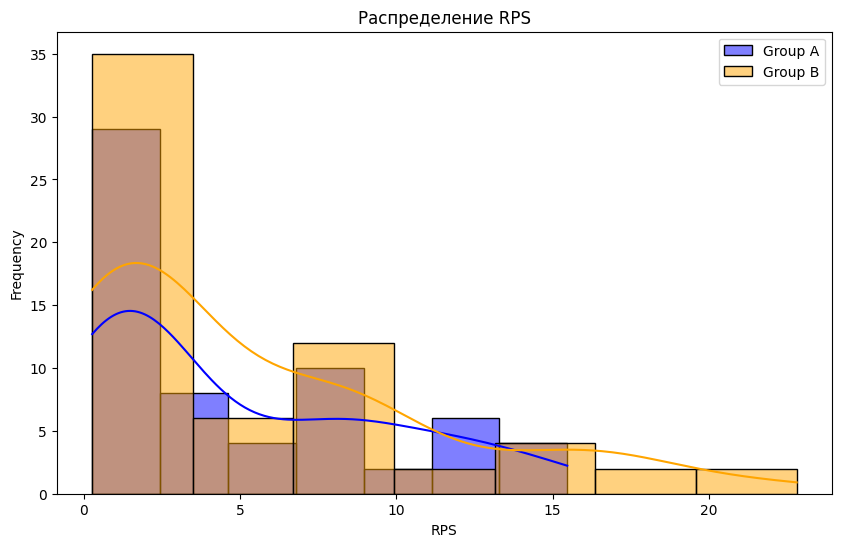

In [98]:
import matplotlib.pyplot as plt

# Функция для построения графиков
def plot_metric(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(group_a[column], kde=True, label='Group A', color='blue')
    sns.histplot(group_b[column], kde=True, label='Group B', color='orange')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Построение графиков для каждого показателя
plot_metric('RPM')
plot_metric('Paid_CTR')
plot_metric('Organic_CTR')
plot_metric('Page_views_per_session')
plot_metric('RPS')

In [100]:
# Расчет средних значений метрик для групп A и B
metrics = ['RPM', 'Paid_CTR', 'Organic_CTR', 'Page_views_per_session', 'RPS']
mean_values = pd.DataFrame({
    'Group A': group_a[metrics].mean(),
    'Group B': group_b[metrics].mean()
})

print(mean_values)

                         Group A   Group B
RPM                     2.497136  2.985061
Paid_CTR                0.020999  0.023893
Organic_CTR             0.067401  0.032069
Page_views_per_session  1.038067  0.854122
RPS                     4.902419  5.501504


In [102]:
# Расчет относительных изменений метрик
relative_changes = (mean_values['Group B'] - mean_values['Group A']) / mean_values['Group A'] * 100
relative_changes = relative_changes.rename('Relative Change (%)')

# Добавление относительных изменений к таблице средних значений
mean_values = pd.concat([mean_values, relative_changes.T])

print(mean_values)

                         Group A   Group B  Relative Change (%)
RPM                     2.497136  2.985061                  NaN
Paid_CTR                0.020999  0.023893                  NaN
Organic_CTR             0.067401  0.032069                  NaN
Page_views_per_session  1.038067  0.854122                  NaN
RPS                     4.902419  5.501504                  NaN
RPM                          NaN       NaN            19.539361
Paid_CTR                     NaN       NaN            13.783992
Organic_CTR                  NaN       NaN           -52.421414
Page_views_per_session       NaN       NaN           -17.719971
RPS                          NaN       NaN            12.220189
